In [1]:
print("Jai Mahakaal 🕉️")

Jai Mahakaal 🕉️


In [2]:
print("36 biradari bhaichara jindabad 💪")

36 biradari bhaichara jindabad 💪


# 3. Perform SVM using the sklearn library for all the kernels and plot the barplot for the comparison results of all the kernels. Use wine dataset and diabetes dataset

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn import datasets


In [10]:
x=datasets.load_wine()
df=pd.DataFrame(x.data,columns=x.feature_names)

In [33]:
df.head()
df.shape

(178, 13)

In [15]:
data=df.copy()
data["Traget"]=x.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Traget
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Traget                          0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Trage

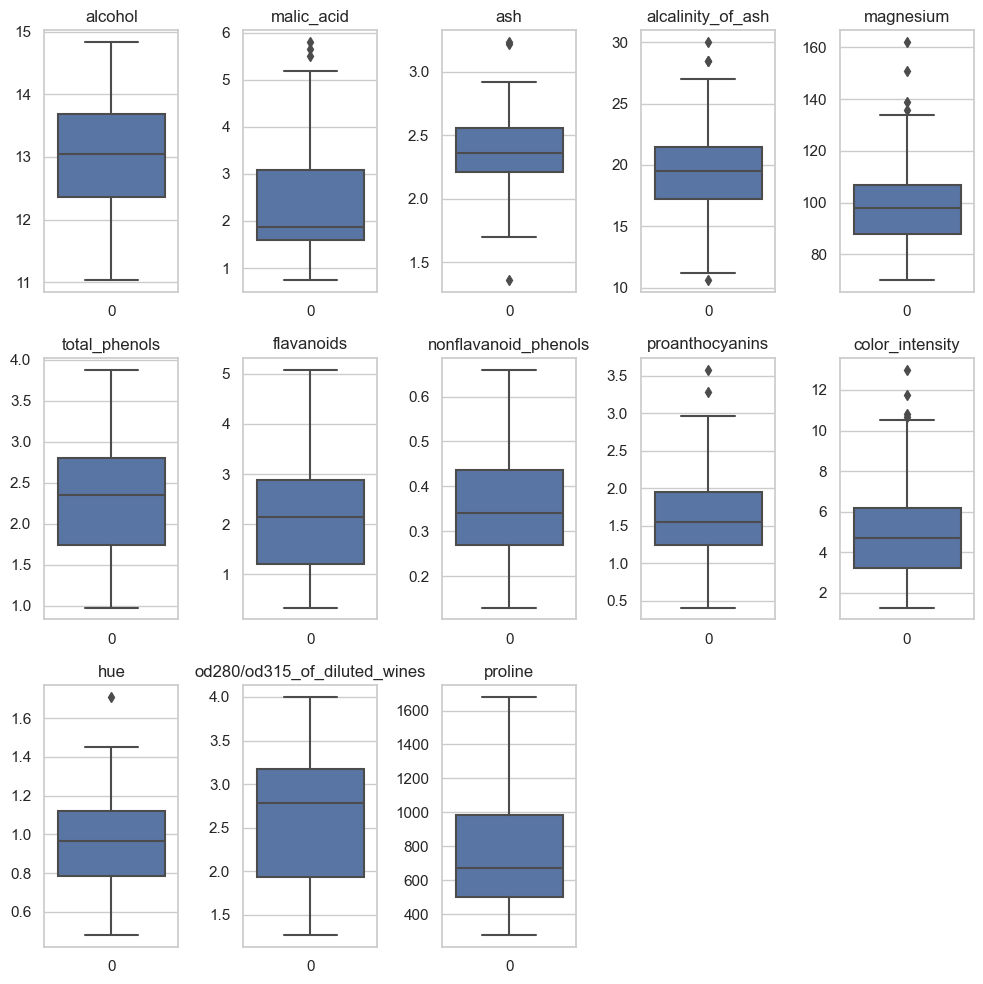

In [51]:
def boxplot(data):
    n=len(data.columns)
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(3,5,1+i)
        plt.title(data.columns[i])
        sns.boxplot(data[data.columns[i]])
    plt.tight_layout()
    plt.show()    
boxplot(df)        

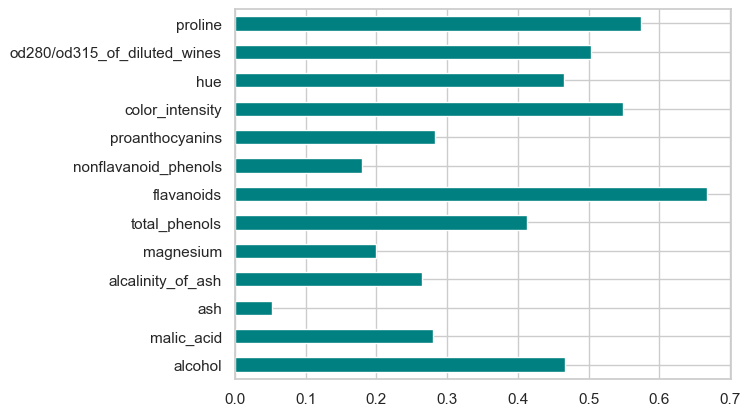

In [67]:
importance=mutual_info_classif(df,data["Traget"])
feat=pd.Series(importance,df.columns[0:len(df.columns)])
feat.plot(kind='barh',color="teal")
plt.show()

In [72]:
feat=df[["flavanoids","proline","color_intensity","hue","alcohol","od280/od315_of_diluted_wines"]]
X_train, X_test, y_train, y_test = train_test_split(feat, data["Traget"], test_size=0.33, random_state=42)

In [73]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [75]:
y_pred=svc.predict(X_test)
accur=accuracy_score(y_test,y_pred)
print(accur)

0.711864406779661


In [77]:
def svm_ke_kernel(feat,target):
    X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.33, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracy=[]
    for i in kernels:
        svc=SVC(kernel=i)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        accur=accuracy_score(y_test,y_pred)
        accuracy.append(accur)
        
    return accuracy     
accurac=svm_ke_kernel(feat,data["Traget"])        

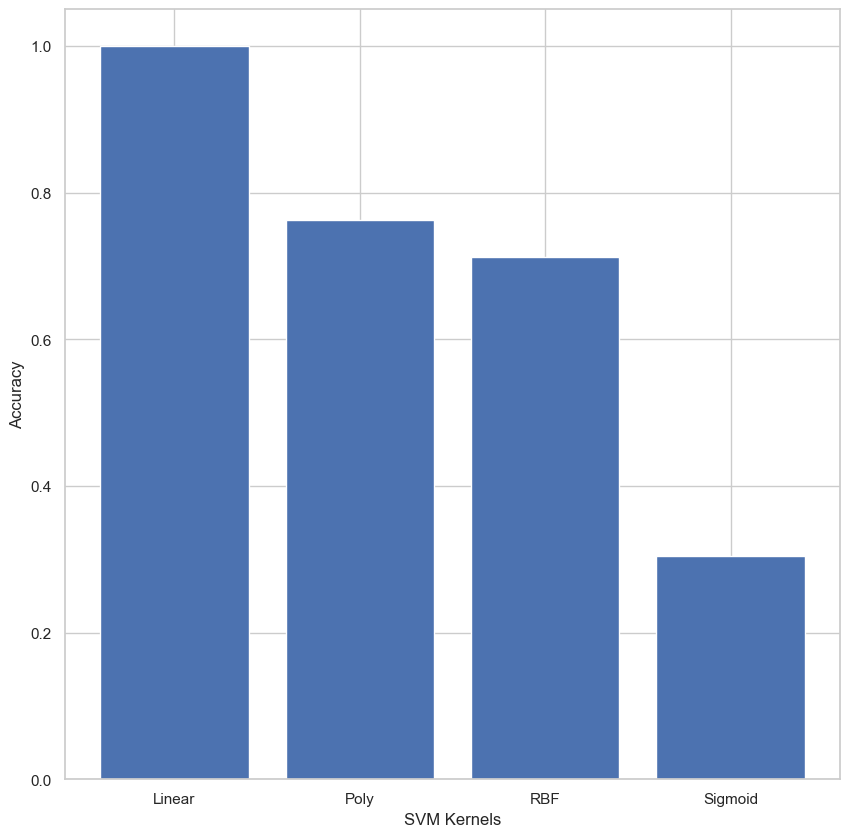

In [81]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(len(accurac)), accurac)
plt.xticks(np.arange(len(accurac)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.show()
